# Demonstration of KMeans using scikit learn
# Author: Abhishek Singhal

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Using elbow method
#### one of the most common method to find optimum value of k is to use the elbow method
#### the optimum value of k is where the elbow forms in graph of k vs within cluster sum of squares

In [86]:
x = iris.drop(['Species'], axis = 1)
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [87]:
from sklearn.cluster import KMeans
sumofsquares = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(x)
    sumofsquares.append(model.inertia_)

#### Now plot the resuls to find the 'elbow'

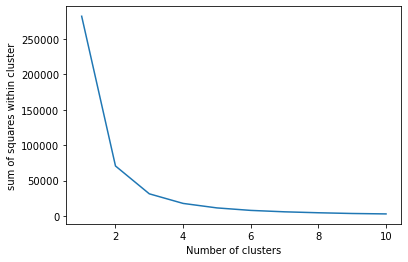

In [88]:
plt.plot(range(1, 11), sumofsquares)
plt.xlabel("Number of clusters")
plt.ylabel("sum of squares within cluster")
plt.show()

##### we can clearly see that the elbow is somewhere between 2 and 4
##### so we choose 3 as the optimum value of 'k'

In [89]:
# now apply k means to see the clusters
kmeans = KMeans(n_clusters=3, init="k-means++", random_state = 42)
y_clusters = kmeans.fit_predict(x)
# y_clusters

In [90]:
x_val = x.iloc[:, [1, 2, 3, 4]].values

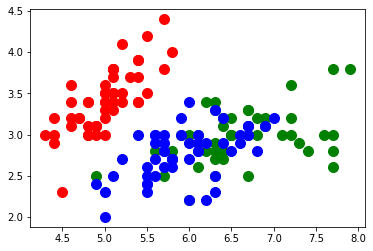

In [91]:
#plot the clusters
plt.scatter(x_val[y_clusters == 0, 0], x_val[y_clusters == 0, 1], s = 100, c = 'red')

plt.scatter(x_val[y_clusters == 1, 0], x_val[y_clusters == 1, 1], s = 100, c = 'green')

plt.scatter(x_val[y_clusters == 2, 0], x_val[y_clusters == 2, 1], s = 100, c = 'blue')

plt.show()